<a href="https://colab.research.google.com/github/KJM94/Single_project/blob/main/%EA%B2%B0%EC%B8%A1%EC%B9%98%20%EB%B3%B4%EA%B0%84%20%EC%B1%8C%EB%A6%B0%EC%A7%80%20%3A%20%EC%9B%94%EA%B0%84%20%EB%8D%B0%EC%9D%B4%EC%BD%98%20%ED%8C%8C%EC%9D%BC%EB%9F%BF/baseline_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

### Load Data

In [ ]:
data = pd.read_csv('./data.csv')
submission = pd.read_csv('./sample_submission.csv')

In [ ]:
# 데이터 타입 변경 함수
def convert_dtype(data):
    for col in data.columns:
        if data[col].dtype == np.float64:
            data[col] = data[col].astype(np.float32)
    return data

data = convert_dtype(data)

### 데이터 살펴보기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62629 entries, 0 to 62628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      62629 non-null  object 
 1   Value   40136 non-null  float32
dtypes: float32(1), object(1)
memory usage: 734.1+ KB


In [ ]:
data['Value'].isnull().sum()

22493

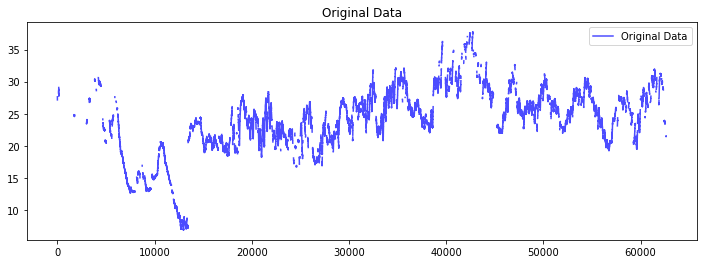

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(data['Value'], color='blue', alpha=0.7, label='Original Data')
plt.title("Original Data")
plt.legend()

### 결측치 보간 1 : zero

In [ ]:
fill_0 = data.copy()
fill_0['Value'].fillna(0,inplace=True)
fill_0

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,0.000000
4,SAMPLE_00004,0.000000
...,...,...
62624,SAMPLE_62624,0.000000
62625,SAMPLE_62625,0.000000
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


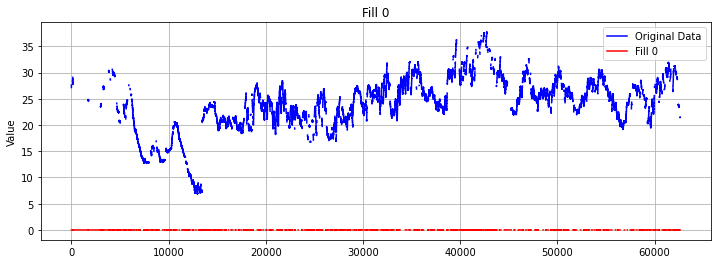

In [ ]:
plt.figure(figsize=(12, 4))


plt.plot(data['Value'], color='blue', label='Original Data')
plt.plot(fill_0['Value'].where(data['Value'].isnull()), color='red', label='Fill 0')

plt.title("Fill 0")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### 결측치 보간 2 : Mean

In [ ]:
fill_mean = data.copy()
fill_mean['Value'].fillna(data['Value'].mean(),inplace=True)
fill_mean

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,23.725576
4,SAMPLE_00004,23.725576
...,...,...
62624,SAMPLE_62624,23.725576
62625,SAMPLE_62625,23.725576
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


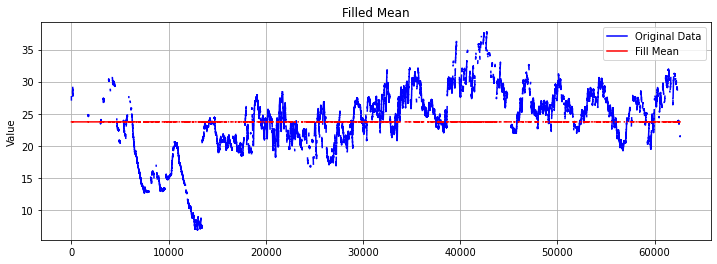

In [ ]:
plt.figure(figsize=(12, 4))


plt.plot(data['Value'], color='blue', label='Original Data')
plt.plot(fill_mean['Value'].where(data['Value'].isnull()), color='red', label='Fill Mean')

plt.title("Filled Mean")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### 결측치 보간 3 : Forward Fill

In [ ]:
fill_ffill = data.copy()
fill_ffill['Value'].fillna(method='ffill',inplace=True)
fill_ffill

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,27.154348
4,SAMPLE_00004,27.154348
...,...,...
62624,SAMPLE_62624,23.682484
62625,SAMPLE_62625,23.682484
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


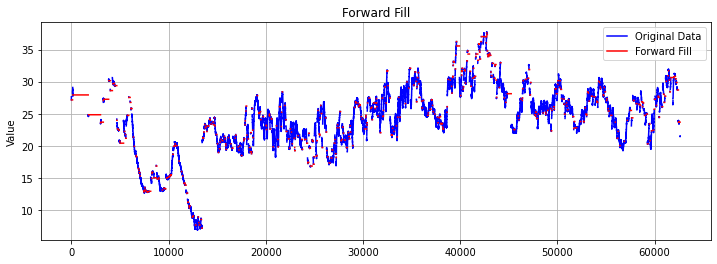

In [ ]:
plt.figure(figsize=(12, 4))


plt.plot(data['Value'], color='blue', label='Original Data')
plt.plot(fill_ffill['Value'].where(data['Value'].isnull()), color='red', label='Forward Fill')

plt.title("Forward Fill")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### 결측치 보간 4 : Back fill

In [ ]:
fill_bfill = data.copy()
fill_bfill['Value'].fillna(method='bfill',inplace=True)
fill_bfill

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,28.505262
4,SAMPLE_00004,28.505262
...,...,...
62624,SAMPLE_62624,21.465771
62625,SAMPLE_62625,21.465771
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


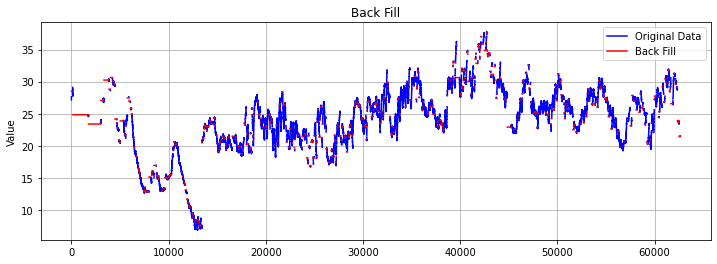

In [ ]:
plt.figure(figsize=(12, 4))


plt.plot(data['Value'], color='blue', label='Original Data')
plt.plot(fill_bfill['Value'].where(data['Value'].isnull()), color='red', label='Back Fill')

plt.title("Back Fill")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### 결측치 보간 5 : KNN Imputer

In [ ]:
fill_knn = data.copy()

# KNN Imputer 설정
imputer = KNNImputer(n_neighbors=2)
fill_knn['Value'] = imputer.fit_transform(fill_knn[['Value']])

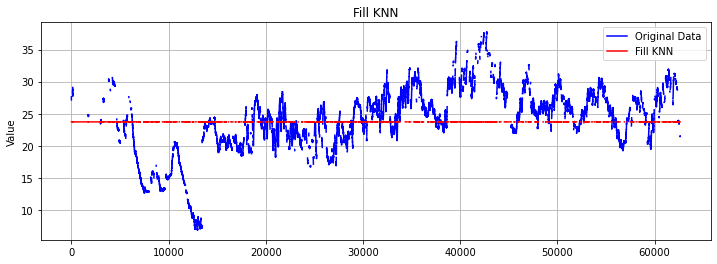

In [ ]:
plt.figure(figsize=(12, 4))


plt.plot(data['Value'], color='blue', label='Original Data')
plt.plot(fill_knn['Value'].where(data['Value'].isnull()), color='red', label='Fill KNN')

plt.title("Fill KNN")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### 결측치 보간 6 : 선형 보간

In [ ]:
interpolated_values = data['Value'].interpolate(method='linear')

fill_linear = data.copy()
fill_linear['Value'] = interpolated_values

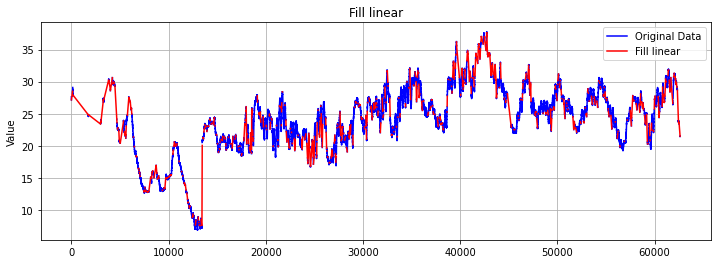

In [ ]:
plt.figure(figsize=(12, 4))


plt.plot(data['Value'], color='blue', label='Original Data')
plt.plot(fill_linear['Value'].where(data['Value'].isnull()), color='red', label='Fill linear')

plt.title("Fill linear")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### Submission

In [ ]:
submission['Value'] = fill_linear['Value']

In [ ]:
submission

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,27.165512
4,SAMPLE_00004,27.176678
...,...,...
62624,SAMPLE_62624,21.505711
62625,SAMPLE_62625,21.485741
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


In [ ]:
submission.to_csv('./base_submit_bfill.csv',encoding='utf-8',index=False)